# Convolutional Neural Networks for Image Classification

In [3]:
import pandas as pd
import numpy as np

In [4]:
from tensorflow.keras.datasets import mnist

In [140]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Visualizing the Image Data

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [8]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [33]:
single_image = x_train[0]

In [34]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

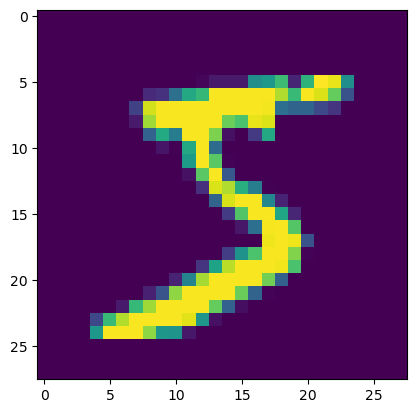

In [17]:
imshow(single_image)

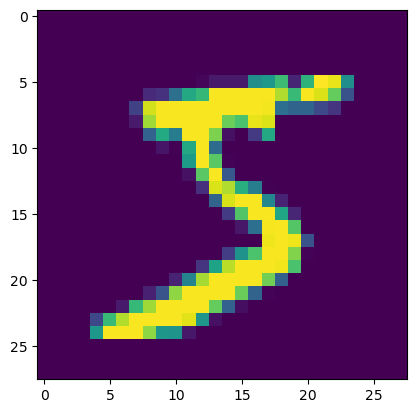

In [20]:
plt.imshow(single_image)

# PreProcessing Data

In [21]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [141]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train.shape

(60000,)

In [25]:
y_example = to_categorical(y_train)

In [26]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [28]:
y_example.shape

(60000, 10)

In [31]:
y_cat_test = to_categorical(y_test,10)

In [32]:
y_cat_train = to_categorical(y_train,10)

In [35]:
x_train = x_train/255
x_test = x_test/255

In [36]:
scaled_single = x_train[0]

In [37]:
scaled_single.max()

1.0

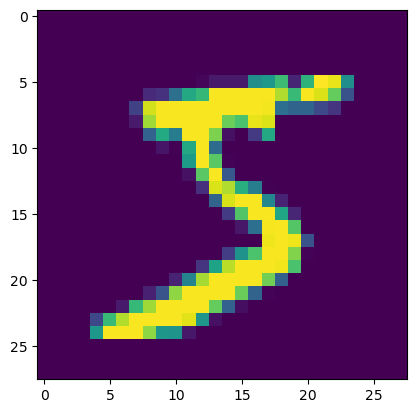

In [38]:
plt.imshow(scaled_single)

# Reshaping the Data

In [40]:
x_train.shape

(60000, 28, 28)

In [42]:
x_test.shape

(10000, 28, 28)

In [44]:
y_train.shape

(60000,)

In [142]:
y_test.shape

(10000,)

In [49]:
y_cat_test.shape

(10000, 10)

In [50]:
x_train = x_train.reshape(60000,28,28,1)

In [51]:
x_test = x_test.reshape(10000,28,28,1)

# Training the Model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPool2D,Flatten

In [73]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (4,4),input_shape = (28,28,1),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))  

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#Output Layer--> Multi Class
model.add(Dense(10,activation ='softmax' ))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])


In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
early_stop = EarlyStopping(monitor='val_loss',patience = 1)

In [77]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1372 - accuracy: 0.9581 - val_loss: 0.0541 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0454 - accuracy: 0.9859 - val_loss: 0.0426 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0375 - val_accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0451 - val_accuracy: 0.9857


In [78]:
metrics = pd.DataFrame(model.history.history)

In [79]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.137227,0.958100,0.054063,0.9826
1,0.045414,0.985933,0.042570,0.9866
2,0.029329,0.990617,0.037470,0.9880
3,0.018894,0.993667,0.045070,0.9857


<Axes: >

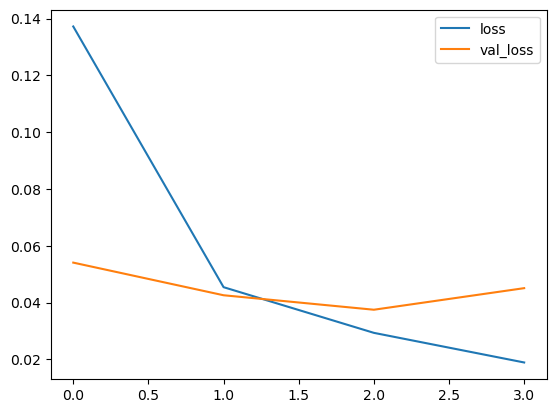

In [80]:
metrics[['loss','val_loss']].plot()

<Axes: >

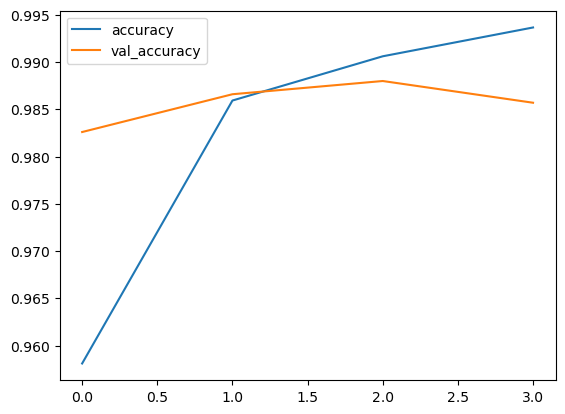

In [81]:
metrics[['accuracy','val_accuracy']].plot()

In [85]:
model.metrics_names

['loss', 'accuracy']

In [86]:
model.evaluate(x_test,y_cat_test,verbose = 0)

[0.045069608837366104, 0.9857000112533569]

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [117]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 3ms/step


In [119]:
pred1 = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 3ms/step


In [143]:
pred1

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [144]:
pred1.shape

(10000,)

In [145]:
pred2 = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 3ms/step


In [146]:
pred2

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [147]:
predictions

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [148]:
y_cat_test.shape

(10000, 10)

In [152]:
y_test.shape

(10000,)

In [154]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [155]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.96      0.99      0.97       974
           9       0.99      0.96      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



C:\Users\vrathore\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       1.00      0.92      0.96      1135
           2       0.98      0.89      0.94      1032
           3       0.99      0.92      0.95      1010
           4       0.97      0.98      0.97       982
           5       1.00      0.90      0.95       892
           6       0.99      0.96      0.97       958
           7       1.00      0.88      0.93      1028
           8       0.60      1.00      0.75       974
           9       0.98      0.82      0.90      1009

    accuracy                           0.93     10000
   macro avg       0.95      0.93      0.93     10000
weighted avg       0.95      0.93      0.93     10000



In [157]:
y_test.shape

(10000,)

In [158]:
y_test[1]

2

In [159]:
confusion_matrix(y_test,pred2)

array([[ 965,    0,    0,    0,    1,    0,    1,    0,   13,    0],
       [   0, 1046,    1,    2,    0,    0,    1,    0,   85,    0],
       [   5,    0,  922,    0,    3,    0,    4,    2,   96,    0],
       [   0,    0,    5,  930,    0,    1,    0,    0,   74,    0],
       [   0,    0,    0,    0,  960,    0,    0,    0,   21,    1],
       [   2,    0,    0,    4,    1,  806,    6,    0,   71,    2],
       [   4,    1,    0,    0,    4,    0,  919,    0,   30,    0],
       [   1,    1,    9,    2,   12,    0,    0,  903,   90,   10],
       [   2,    0,    0,    0,    0,    0,    0,    0,  972,    0],
       [   2,    1,    0,    0,   10,    0,    0,    0,  166,  830]],
      dtype=int64)